<a href="https://colab.research.google.com/github/ubiratantavares/tcc_puc_minas/blob/main/preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamento dos dados brutos

In [ ]:
# importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [ ]:
# configurar ambiente
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_colwidth', 30)

In [ ]:
# carregar base de dados
def load_data(filename):
  path = "/content/drive/MyDrive/tcc/data/"
  path_filename = path + filename
  return pd.read_csv(path_filename, delimiter=',')

In [ ]:
# criar dataframe por meio do carregamento da base de dados
df = load_data("dados_brutos.csv")

In [ ]:
# verificar total de linhas e colunas da base de dados
df.shape

(86117, 11)

In [ ]:
df.head()

,Reg.,Data,Hora,kW,kvarIND,kvarCAP,SH,SR,FPot.,DCR,UFER
0,8631.0,2018-07-18,00:00:00,8.0,7.0,0.0,F,L,78 L,10.0,1.0
1,8634.0,2018-07-18,00:15:00,8.0,7.0,0.0,F,C,78 L,NaN,NaN
2,8637.0,2018-07-18,00:30:00,8.0,7.0,0.0,F,C,78 L,NaN,NaN
3,8640.0,2018-07-18,00:45:00,5.0,5.0,0.0,F,C,71 L,NaN,NaN
4,8643.0,2018-07-18,01:00:00,5.0,7.0,0.0,F,C,60 L,NaN,NaN


In [ ]:
# verificar os tipos de dados dos atributos da base de dados
df.dtypes

Reg.       float64
Data        object
Hora        object
kW         float64
kvarIND    float64
kvarCAP    float64
SH          object
SR          object
FPot.       object
DCR        float64
UFER       float64
dtype: object

In [ ]:
# verificar quantidade de dados faltantes nos atributos da base de dados
df.isna().sum()

Reg.           4
Data           4
Hora           4
kW             4
kvarIND        4
kvarCAP        4
SH             4
SR             4
FPot.          4
DCR        72779
UFER       72779
dtype: int64

In [ ]:
# excluir atributos da base de dados não utilizados como atributos previsores 
df.drop(columns=['Reg.', 'kvarIND', 'kvarCAP', 'SH', 'SR', 'DCR', 'UFER'], inplace=True)

In [ ]:
# verificar quantidade de dados faltantes nos atributos da base de dados
df.isna().sum()

Data     4
Hora     4
kW       4
FPot.    4
dtype: int64

In [ ]:
# excluir linhas com dados faltantes na base de dados
df = df.dropna()

In [ ]:
# verificar quantidade de dados faltantes nos atributos da base de dados
df.isna().sum()

Data     0
Hora     0
kW       0
FPot.    0
dtype: int64

In [ ]:
# verificar total de linhas e colunas da base de dados
df.shape

(86113, 4)

In [ ]:
# verificar os tipos de dados dos atributos da base de dados
df.dtypes

Data      object
Hora      object
kW       float64
FPot.     object
dtype: object

In [ ]:
# verificar as 5 primeiras linhas da base de dados
df.head()

,Data,Hora,kW,FPot.
0,2018-07-18,00:00:00,8.0,78 L
1,2018-07-18,00:15:00,8.0,78 L
2,2018-07-18,00:30:00,8.0,78 L
3,2018-07-18,00:45:00,5.0,71 L
4,2018-07-18,01:00:00,5.0,60 L


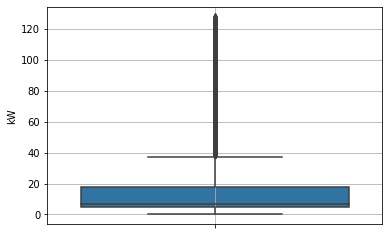

In [ ]:
# verificar a distribuição dos dados do atributo numérico kW por meio do gráfico Box-Plot
sns.boxplot(y='kW', data=df)
plt.grid()
# salvar gráfico Blox-Plot da distribuição dos dados do atributo numérico kW
plt.savefig('/content/drive/MyDrive/tcc/imagens/boxplot_kw.png')
plt.show()

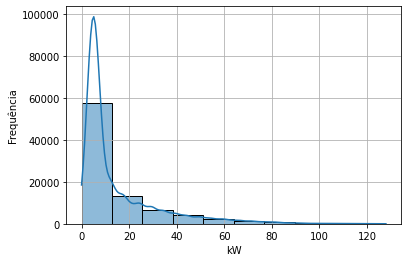

In [ ]:
# verificar a distribuição dos dados do atributo numérico kW por meio do histograma
sns.histplot(x="kW", data=df, bins=10, kde=True)
plt.xlabel("kW")
plt.ylabel("Frequência")
plt.grid()
# salvar o histograma da distribuição dos dados do atributo numérico kW
plt.savefig('/content/drive/MyDrive/tcc/imagens/histograma_kw.png')
plt.show()

In [ ]:
# criar o atributo "DataHora" por meio da junção dos atributos "Data" e "Hora"
df['DataHora']  = df['Data'] + ' ' + df['Hora']

# transformar o tipo Object do atributo "DataHora" em tipo Datetime
df['DataHora'] = pd.to_datetime(df['DataHora'])

In [ ]:
# criar os atributos "FP" e "FP_Tipo" por meio da separação do tipo Object do atributo "FPot."
df[['FP', 'FP_Tipo']] = df['FPot.'].str.split(' ', expand=True)

# transformar o tipo Object do atributo "FP" em tipo numérico
df['FP'] = pd.to_numeric(df['FP'])

# transformar os valores do atributo "FP" em valores decimais contidos no intervalo de 0 a 1.
df['FP'] = df['FP']/100.0

In [ ]:
# verificar os tipos de dados dos atributos da base de dados
df.dtypes

Data                object
Hora                object
kW                 float64
FPot.               object
DataHora    datetime64[ns]
FP                 float64
FP_Tipo             object
dtype: object

In [ ]:
# excluir atributos da base de dados não utilizados como atributos previsores 
df.drop(columns=['Data', 'Hora', 'FPot.', 'FP_Tipo'], inplace=True)

In [ ]:
df.head()

,kW,DataHora,FP
0,8.0,2018-07-18 00:00:00,0.78
1,8.0,2018-07-18 00:15:00,0.78
2,8.0,2018-07-18 00:30:00,0.78
3,5.0,2018-07-18 00:45:00,0.71
4,5.0,2018-07-18 01:00:00,0.60


In [ ]:
df.describe()

,kW,FP
count,86113.000000,86113.000000
mean,14.766586,0.730113
std,17.426451,0.187726
min,0.000000,0.000000
25%,5.000000,0.600000
50%,7.000000,0.710000
75%,18.000000,0.890000
max,128.000000,1.000000


In [ ]:
# verificar os tipos de dados dos atributos da base de dados
df.dtypes

kW                 float64
DataHora    datetime64[ns]
FP                 float64
dtype: object

In [ ]:
# criar novos recursos (atributos) extraídos por meio do atriibuto "DataHora"
df['Trimestre'] = df['DataHora'].dt.quarter
df['Mes'] = df['DataHora'].dt.month
df['Semana'] = df['DataHora'].dt.dayofweek
df['Dia'] = df['DataHora'].dt.day
df['Hora'] = df['DataHora'].dt.hour
df['Minuto'] = df['DataHora'].dt.minute

In [ ]:
# verificar os tipos de dados dos atributos da base de dados
df.dtypes

kW                  float64
DataHora     datetime64[ns]
FP                  float64
Trimestre             int64
Mes                   int64
Semana                int64
Dia                   int64
Hora                  int64
Minuto                int64
dtype: object

In [ ]:
"""
NOTA: valores possíveis para o atributo "Evento"
0: consumidor com a demanda medida menor ou igual a demanda contratada (demanda medida <= demanda contratada)
1: consumidor com a demanda medida maior que a demanda contratada (demanda medida > demanda contratada)
"""

# defiinir as classes do atributo "Evento"
eventos = [0, 1]

# definir valor da demanda contratada]
dc = 80

# definir as condicoes de ocorreência ou não da ultrapassagem de demanda, considerando o valor da demanda contratada e os valores do atributo "kW" 
condicoes = [(df['kW'] <= dc), (df['kW'] > dc)]

# criar o atributo "Evento" com base nas definições das condicoes e eventos
df['Evento'] = np.select(condicoes, eventos)

In [ ]:
# verificar os tipos de dados dos atributos da base de dados
df.dtypes

kW                  float64
DataHora     datetime64[ns]
FP                  float64
Trimestre             int64
Mes                   int64
Semana                int64
Dia                   int64
Hora                  int64
Minuto                int64
Evento                int64
dtype: object

In [ ]:
# excluir atributos da base de dados não utilizados como atributos previsores 
df.drop(columns=['DataHora', 'kW'], inplace=True)

In [ ]:
# verificar os totais e percentuais de cada classe do atributo "Evento"
df_eventos = df['Evento']
counter = Counter(df_eventos)

for k, v in counter.items():
    per = v/len(df_eventos) * 100
    print('Class={}, n={} ({:.2f}%)'.format(k, v, per))

Class=0, n=85204 (98.94%)
Class=1, n=909 (1.06%)


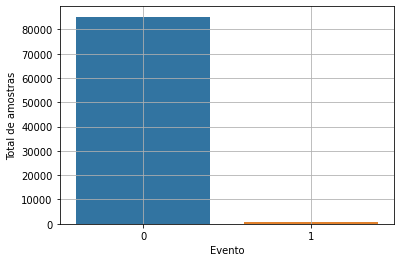

In [ ]:
# verificar os totais de cada classe do atributo "Evento"
ax = sns.countplot(data=df, x=df_eventos)
np.bincount(df_eventos)
plt.xlabel("Evento")
plt.ylabel("Total de amostras")
plt.grid()
plt.savefig('/content/drive/MyDrive/tcc/imagens/grafico_coluna_nivel.png')
plt.show()

In [ ]:
df.head()

,FP,Trimestre,Mes,Semana,Dia,Hora,Minuto,Evento
0,0.78,3,7,2,18,0,0,0
1,0.78,3,7,2,18,0,15,0
2,0.78,3,7,2,18,0,30,0
3,0.71,3,7,2,18,0,45,0
4,0.60,3,7,2,18,1,0,0


In [ ]:
# salvar dataframe em arquivo csv
def save_data(df, filename):
  path = "/content/drive/MyDrive/tcc/data/"
  path_filename = path + filename
  df.to_csv(path_filename, index=False)
  return None

In [ ]:
# salvar dataframe
save_data(df, "dados_tratados.csv")